# Practical 9 Reinfocement Learning

In this practical we're going to build up a simple environment, observer and agent from scratch. We'll be looking at a simple problem case which can be solved as a bandit problem.

## The scenario:

You have an autonomous boat that you want to use for dolphin watching. For simplicity we're going to say that you can only see dolphins if they're in front of the boat. The boat can be in one of ten locations (0-9) which form a straight line. At each point in time the boat will be at one of these locations and the dolpins will be at one of the others. We assume that the numbers run left to right, so 0 is left of 9.

At each point in time the boat will face either LEFT or RIGHT. So if it's at position 3 and facing LEFT it can see dolphins at locations 0,1,2. 

The dolphins appear at random locations at each time step. If the boat is facing in the correct direction to see the dolpins it gets a reward of one while if it is facing in the wrong direction then the reward is zero. If the dolphins and boat are at the same location then the reward is zero as the dolphins don't surface.

The idea is to produce a Q-Learning solution to work out which direction the boat should be facing in order to see the dolphins.

Let's set up some variables:

alpha - the learning rate

count - how many steps we've taken

LEFT - the action face left

RIGHT - the action face right

action - the action taken - either LEFT or RIGHT, set to -1 initially as we've not got an action yet

Q\[][] - the Q-Learning matrix, initialised to all zeros

epsilon - the probability we choose our action randomly

In [1]:
import random

alpha = 0.1
count = 0
LEFT = 0 
RIGHT = 1
action = -1
lastLocation = 5
Q = [[0,0], [0,0], [0,0], [0,0], [0,0], [0,0], [0,0], [0,0], [0,0], [0,0]]
epsilon = 0.01

We need to build up the code in reverse - so let's start with the code to select the action at random. This should produce either LEFT or RIGHT at random with equal probability.

In [2]:
def random_action():
  # Pick the action of either RIGHT or LEFT - remember LEFT = 0, RIGHT = 1
  act = random.randint(LEFT,RIGHT) # delete
  return act

Now here's the code to select the argmax for the action. It searches the Q-Matrix for the largest value for a given state and returns the action for that state.

In [3]:
def findMax(state):
  # First check to see if all actions have the same expected reward:
  if (Q[state][LEFT] == Q[state][RIGHT]): # delete contents of comparison
    # Both are the same so choose one at random
    ret =  random_action() # delete
  # Find the action with the greatest reward - call it ret
  elif (Q[state][LEFT] > Q[state][RIGHT]): # delete
    ret = LEFT # delete
  else: # delete 
    ret = RIGHT # delete
  return ret

The environment:

We need to define the environment. This takes the last action and produces the next state of the environment. As the environment is not affected by the last action we can ignore this. But this does need to be passed to the observer so it can decide on the reward. All we need to do is decide the next random location where the dolphins are going to appear. We pack the two values env and action into one object.

In [4]:
def update_environment(action):
  # choose location of next sighting - a value picked at random between 0 and 9
  env = random.randint(0,9) # delete to =
  # Pack these into a single variable for sending back
  envpac = [env, action]
  return envpac

The observer takes in the environment data and uses the global information about where the dolphins were last seen to compute the reward. First we unpack the environment into the action and state. We can then compute the reward for the action and state combination using the lastLocation of the boat.

In [5]:
def produce_observation(environment):
  global lastLocation
  sta = environment[0]
  act = environment[1]
  # if we're facing RIGHT and the dolphins are to our right (sta > lastLocation) then we get a reward of 1
  if (act == RIGHT and sta > lastLocation): # delete comparison
    rew = 1
  # if we're facing LEFT and the dolphins are to our left (sta < lastLocation) then we get a reward of 1
  elif (act == LEFT and sta < lastLocation): # delete comparison
    rew = 1
  else:
    # all other combinations give a reward of zero
    rew = 0 # delete
    # Move to the location of the dolphins
  lastLocation = sta # delete
  return sta, rew 

We're now able to produce the agent. The first thing the agent will do is to update the Q-Matrix with the reward it recieves and the state the system was in. But the first time there may not be an action - so skip in this case. We then need to pick the action. We're using an epsilon-greedy policy so either we choose the action at random with probability epsilon or we find the best action given that we're in a particular state. We can do this using findMax(state).

In [6]:
def agent_decides_action(state, reward):
  # always a reward so process it
  if (action != -1): # first loop around so do nothing
    # update the Q-Matrix using the equation for a bandit problem (see slides)
    Q[state][action] = (1-alpha)*Q[state][action] + alpha * reward # delete to =

  # Now pick the next action
  # Choose if we're going to do exploration or exploitation
  # Pick a random number [0,1] and if it's less than epsilon we're doing exploration
  if (random.uniform(0,1) < epsilon): # delete comparison
    # Exploration
    # Pick an action at random
    act = random_action() # delete to =
  else:
    # Exploitation
    # pick the action with the highest expected reward when the satate is state
    act = findMax(state) # delete to =
  return act

From the lectures we take the psudocode for the main loop and implement it in python here:

While (not_finished):

  environment = Update_environment(action) 

  state, reward = Produce_observation(environment)

  action = Agent_decides_action(state, reward)


In [7]:
while (count < 10000000): # place the psudo code below:
  environment = update_environment(action) # delete to =
  state, reward = produce_observation(environment) # delete to =
  action = agent_decides_action(state, reward) # delete to = 
  count = count + 1

Let's take a look at the Q-Matrix

In [8]:
for i in range(10):
  print(Q[i])

[0.7893569285889689, 0.0]
[0.5309329929656793, 1.0236176445090683e-75]
[0.47259536349319375, 2.526191018699956e-23]
[0.09962516691912884, 3.5806576639020145e-14]
[0.057953791962780186, 1.9622178370233813e-12]
[0.0020275559590445286, 0.030098400488138957]
[7.894778461885567e-38, 0.2038436479159662]
[3.360526638669223e-25, 0.4887263876021688]
[2.427494459557774e-05, 0.6123405488611526]
[0.0, 0.7222443151628584]


In order to plot the matrix we need to swap rows and columns.

In [9]:
Q2 = list(map(list, zip(*Q)))

Now let's plot the Q-Matrix. As we only have two actions we can do this. We colour LEFT actions Blue and RIGHT actions green.

<BarContainer object of 10 artists>

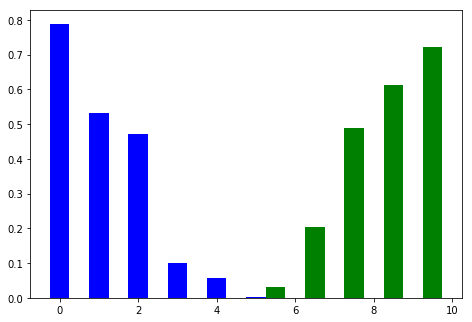

In [10]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

data = Q2
X = np.arange(10)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(X + 0.0, data[0], color = 'b', width = 0.5)
ax.bar(X + 0.5, data[1], color = 'g', width = 0.5)

## Exercises

Once you've got the code working above you can try:

1. Increase the space from 10 cells (0-9) to 20 cells (0-19). How does this affect things?
2. What happens if you vary the value of alpha?
3. How does changing the maximum value for count do?
4. What happens if you vary the value of epsilon?